## Tuodaan tarvittavat kirjastot

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

Luetaan ja siistitään csv-tiedosto ja suodatetaan Lappi

In [56]:
df = pd.read_csv("yopymiset2024.csv", sep=";", encoding="latin1", skiprows=1)
df.columns = df.columns.str.strip()

df_lappi = df[df["Maakunta"] == "Lappi"]

Poistetaan suomalaiset sekä ryhmitellään ulkomaalaiset maittain ja muodostetaan Muut ryhmä (maat joiden arvo on alle 40 000)

In [57]:
df_ulkomaat = df_lappi[df_lappi["Maa"] != "Suomi"]

maat_data = dict(df_ulkomaat.groupby("Maa")["2024 Yöpymiset, lkm"].sum())
raja = 40000
suuret = {maa: arvo for maa, arvo in maat_data.items() if arvo >= raja}
pienet = {maa: arvo for maa, arvo in maat_data.items() if arvo < raja}
suuret["Muut"] = sum(pienet.values())

Tehdään piirakka kaavio

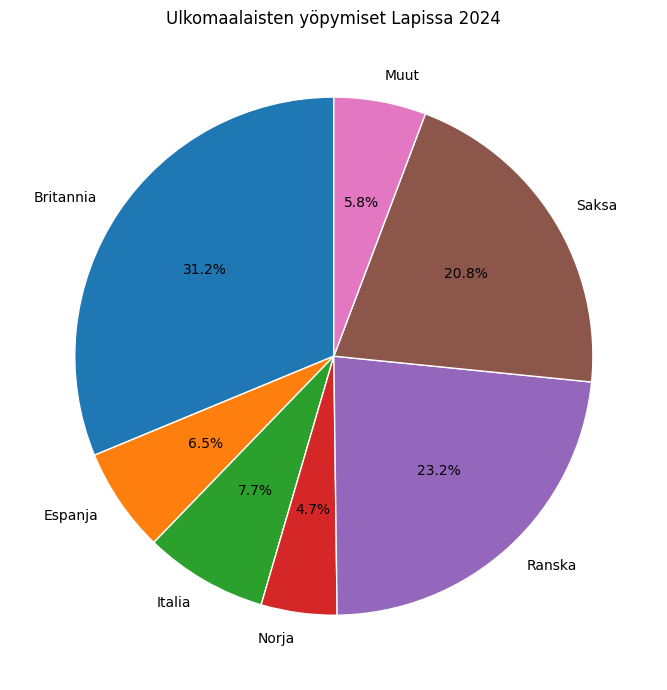

In [58]:
maat_nimet = list(suuret.keys())
yopymiset = list(suuret.values())

fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(
    yopymiset,
    labels=maat_nimet,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={"edgecolor": "white"}
)
ax.set_title("Ulkomaalaisten yöpymiset Lapissa 2024")
plt.tight_layout()
plt.show()

Lasketaan summat

In [59]:
suomalaiset = df_lappi[df_lappi["Maa"] == "Suomi"]["2024 Yöpymiset, lkm"].sum()
ulkomaalaiset = df_ulkomaat["2024 Yöpymiset, lkm"].sum()

Tehdään piirakka kaavio Suomalaiset vs Ulkomaalaiset

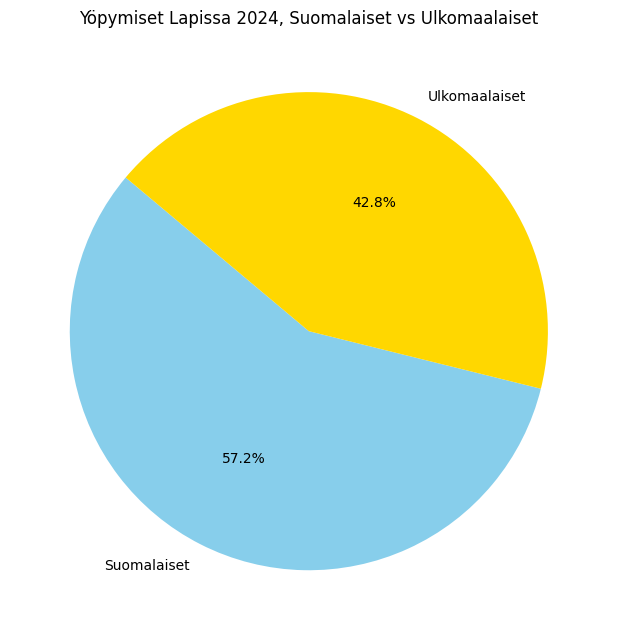

In [60]:
fig2, ax2 = plt.subplots(figsize=(6.5, 6.5))
ax2.pie(
    [suomalaiset, ulkomaalaiset],
    labels=["Suomalaiset", "Ulkomaalaiset"],
    autopct="%.1f%%",
    colors=['#87CEEB', '#FFD700'],
    startangle=140
)
ax2.set_title("Yöpymiset Lapissa 2024, Suomalaiset vs Ulkomaalaiset")
plt.tight_layout()
plt.show()